In [30]:
import pandas as pd
import numpy as np
import math
from scipy import special
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats as sm
from matplotlib import cm

In [31]:
# N_steps = 10
N_steps_orig = 1800 
N_k = 64
T_h = 18000
N_x = 21
N_y = 21

### Define input files


In [32]:
# result_loc = "./../../../../Server_results/10_04_2021_less_random/"
# run_name = "experiment04_10_11_04_40"

# result_loc = "./../../../../Server_results/10_12_2021_mul_q/"
# run_name = "experiment10_10_22_51_50"

result_loc = "./../../../../Server_results/10_21_2021_lambda_x_10/"
run_name = "experiment19_10_12_09_1"

train_loc = "Run_no_zero_flow_no_oscilations_Run_Run_1633563563/"

# run_name = "experiment06_10_11_17_57"
# train_loc = "Run_no_zero_flow_no_oscilations_Run_Run_1633466607/"

### Load files and reshape them

In [33]:

p = np.loadtxt(f"{result_loc}{run_name}p.txt")
p = p.reshape([-1,N_k])

N_epoch = p.shape[0]

q_x = np.loadtxt(f"{result_loc}{run_name}q_x.txt")
q_x = q_x.reshape([N_epoch,N_k,-1])
q_y = np.loadtxt(f"{result_loc}{run_name}q_y.txt")
q_y = q_y.reshape([N_epoch,N_k,-1])
k_x = np.loadtxt(f"{result_loc}{run_name}k_x.txt")
k_x = k_x.reshape([N_epoch,N_k,-1])
k_y = np.loadtxt(f"{result_loc}{run_name}k_y.txt")
k_y = k_y.reshape([N_epoch,N_k,-1])
k_xy = np.loadtxt(f"{result_loc}{run_name}k_xy.txt")
k_xy = k_xy.reshape([N_epoch,N_k,-1])

lam = np.loadtxt(f"{result_loc}{run_name}lambda.txt")

N_steps = q_x.shape[2]

In [34]:
q_x.shape

(71, 64, 50)

In [35]:
def plot_cdf(p,qoi,time_step,epoch,label=''):
    P = p[epoch]
    QOI = qoi[epoch,:,time_step]

    index = np.argsort(QOI)
    plt.plot(np.ravel([QOI[index],QOI[index]],'f'),np.ravel([np.array([0,*np.cumsum(P)[:-1]]),np.cumsum(P)],'F'),label=label)

Evolution of cdf for different lambda

In [36]:
q_MC_x = np.loadtxt(f"{train_loc}Q_x_5.txt")
q_MC_y = np.loadtxt(f"{train_loc}Q_y_5.txt")


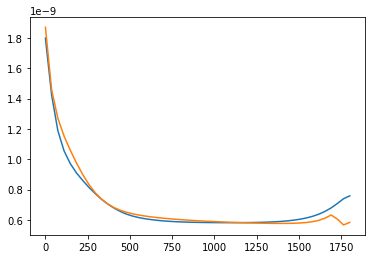

In [37]:
epoch = 1
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))
epoch = 11
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))


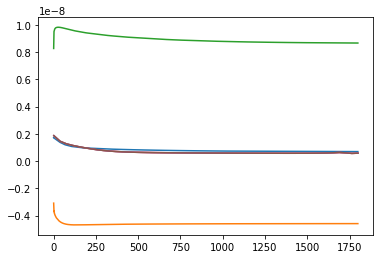

In [38]:
epoch = 31


plt.plot(q_MC_y.mean(axis=0))
plt.plot(q_MC_y.min(axis=0))
plt.plot(q_MC_y.max(axis=0))

# plt.plot(q_MC_y.min(axis=0))
# plt.plot(q_MC_y.max(axis=0))
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))
plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].max(axis=0))
plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].min(axis=0))

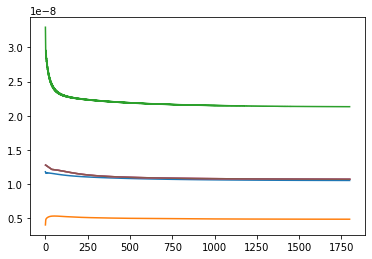

In [83]:
epoch = 2
plt.plot(q_MC_x.mean(axis=0))
plt.plot(q_MC_x.min(axis=0))
plt.plot(q_MC_x.max(axis=0))

plt.plot(np.linspace(1,1800,N_steps),np.inner(q_x[epoch,:,:].T,p[epoch,:]))
plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].max(axis=0))
plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].min(axis=0))

In [67]:
p[37,:]

array([1.25000000e-01, 1.25000000e-01, 1.25000000e-01, 1.25000000e-01,
       1.25000000e-01, 1.25000000e-01, 1.25000000e-01, 1.25000000e-01,
       4.65009497e-45, 4.65009497e-45, 4.65009497e-45, 4.65009497e-45,
       4.65009497e-45, 4.65009497e-45, 4.65009497e-45, 4.65009497e-45,
       4.65009497e-45, 4.65009497e-45, 4.65009497e-45, 4.65009497e-45,
       4.65009497e-45, 4.65009497e-45, 4.65009497e-45, 4.65009497e-45,
       4.65009497e-45, 4.65009497e-45, 4.65009497e-45, 4.65009497e-45,
       4.65009497e-45, 4.65009497e-45, 4.65009497e-45, 4.65009497e-45,
       4.65009497e-45, 4.65009497e-45, 4.65009497e-45, 4.65009497e-45,
       4.65009497e-45, 4.65009497e-45, 4.65009497e-45, 4.65009497e-45,
       4.65009497e-45, 4.65009497e-45, 4.65009497e-45, 4.65009497e-45,
       4.65009497e-45, 4.65009497e-45, 4.65009497e-45, 4.65009497e-45,
       4.65009497e-45, 4.65009497e-45, 4.65009497e-45, 4.65009497e-45,
       4.65009497e-45, 4.65009497e-45, 4.65009497e-45, 4.65009497e-45,
      

In [77]:
k_y[37,:,40] - k_y[35,:,40]

array([ 1.31119099e-05,  2.11603786e-05, -9.65638888e-06, -9.27975695e-06,
        4.21928499e-05, -8.96140588e-06,  2.80561051e-05,  2.80633250e-05,
       -3.06162714e-10, -2.48063326e-10, -3.12471756e-10,  3.59727419e-10,
       -8.03582940e-11, -3.56246085e-10, -2.48168820e-10, -6.17782460e-11,
       -2.31423389e-10, -2.81751871e-11, -1.60959744e-10, -3.28794705e-10,
       -2.96359820e-10, -1.97030034e-11, -3.27509884e-10, -2.13386990e-10,
       -5.73224069e-11, -3.98841539e-10,  1.17800821e-11, -1.66519236e-10,
        1.03985883e-10,  4.72883561e-11, -2.08190338e-10,  3.00984371e-10,
       -3.57838404e-10,  1.95053563e-10,  3.95096819e-10, -2.23634804e-10,
        3.60943035e-10,  1.25326533e-10,  6.82117812e-11, -1.76408569e-10,
        1.21498694e-10,  3.42005766e-10, -3.35654570e-10, -1.83976372e-11,
       -2.77322960e-11,  1.59033513e-10,  3.79842455e-10, -2.37812367e-11,
       -1.80980450e-10, -2.80096336e-10,  1.39216384e-10,  1.96279379e-10,
        1.53716731e-10,  

In [70]:
k_xy[36,:,40]

array([-7.51498999e-09, -7.48811809e-09, -7.45791937e-09, -7.49978231e-09,
       -7.36965597e-09, -7.38781083e-09, -7.45736202e-09, -7.54385329e-09,
       -1.19570907e-08, -1.20020092e-08, -1.20173526e-08, -1.19735068e-08,
       -1.19708991e-08, -1.19444915e-08, -1.19928729e-08, -1.19573704e-08,
       -1.19497627e-08, -1.19552003e-08, -1.19895898e-08, -1.19595948e-08,
       -1.19737003e-08, -1.20041446e-08, -1.19767910e-08, -1.19929367e-08,
       -1.20147083e-08, -1.19977245e-08, -1.19554253e-08, -1.19794596e-08,
       -1.19533516e-08, -1.19791241e-08, -1.19922808e-08, -1.20120658e-08,
       -1.19792243e-08, -1.19900220e-08, -1.19983024e-08, -1.19515254e-08,
       -1.19777471e-08, -1.19761477e-08, -1.19904409e-08, -1.19386886e-08,
       -1.19918848e-08, -1.19686552e-08, -1.20312817e-08, -1.19799818e-08,
       -1.19969732e-08, -1.19300310e-08, -1.19495713e-08, -1.19829993e-08,
       -1.19470463e-08, -1.20218860e-08, -1.19665668e-08, -1.19812614e-08,
       -1.19530755e-08, -

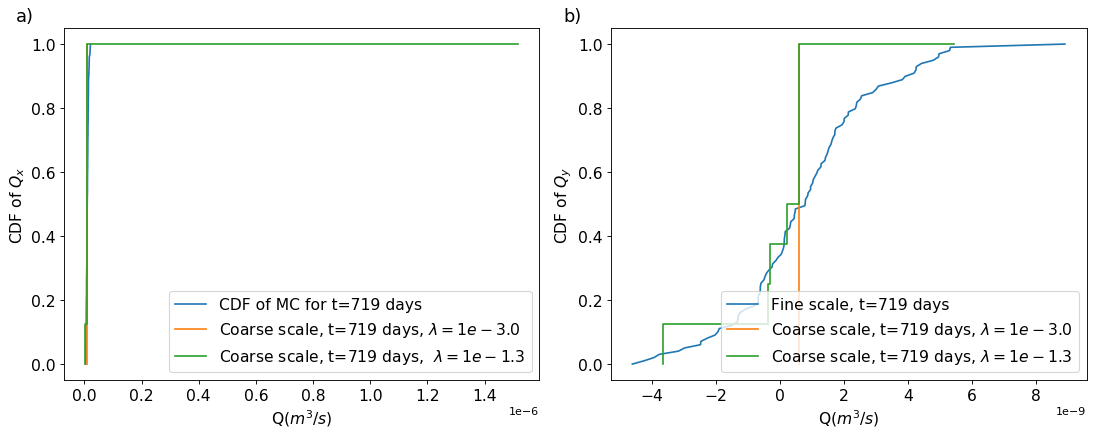

In [63]:
epoch_1 = 1
epoch_2 = 37

time_step = 20


my_dpi = 80
fig, axs = plt.subplots(1, 2, figsize=(1100/my_dpi, 400/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)
ax1 = plt.subplot(121)
ax1.text(-0.1, 1.02, 'a)', transform=ax1.transAxes,size=16)

ii = N_steps_orig//(N_steps-1) * (time_step) -1

Q_MC = q_MC_x[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100),label=rf'CDF of MC for t={ii} days')
plot_cdf(p,q_x ,time_step,epoch_1,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_1],1)}$')
plot_cdf(p,q_x ,time_step,epoch_2,label=rf'Coarse scale, t={ii} days,  $\lambda = 1e{np.round(lam[epoch_2],1)}$')

plt.xlabel(r'Q($m^3/s$)', fontsize= 14)
plt.ylabel(r'CDF of $Q_x$', fontsize= 14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc=4, fontsize= 14)


ax1 = plt.subplot(122)
ax1.text(-0.1, 1.02, 'b)', transform=ax1.transAxes,size=16)

Q_MC = q_MC_y[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100),label=rf'Fine scale, t={ii} days')
plot_cdf(p,q_y ,time_step,epoch_1,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_1],1)}$')
plot_cdf(p,q_y ,time_step,epoch_2,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_2],1)}$')

plt.xlabel(r'Q($m^3/s$)', fontsize= 14)
plt.ylabel(r'CDF of $Q_y$', fontsize= 14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc=4, fontsize= 14)
plt.savefig('./../../../plots/2d_cdf_paper.pdf', bbox_inches='tight',dpi=my_dpi)

plt.show()

In [53]:
# x1_2d = k_y[epoch,:,:]
# w1 = p[epoch,:]
# d1 = sm.DescrStatsW(x1_2d, weights=w1)
# df_mean = d1.mean
# df_perc = d1.quantile([0.25,0.5,0.75]).values.T

In [17]:
# b_perc =df_perc


In [47]:
def plot_k(t,k,p,epoch):
    x1_2d = k[epoch,:,:]
    w1 = p[epoch,:]
    d1 = sm.DescrStatsW(x1_2d, weights=w1)
    df_mean = d1.mean
    df_perc = d1.quantile([0.1,0.5,0.9]).values.T
    b_perc =df_perc

    plt.fill_between(t,b_perc[:,0],b_perc[:,2],color=cm.get_cmap('tab20c')(3))
    plt.plot(t,b_perc[:,0], linewidth=2.5,label=r'$10^{th} / 90^{th}   percentile$',color=cm.get_cmap('tab20c')(0))
    plt.plot(t,b_perc[:,2], linewidth=2.5,color=cm.get_cmap('tab20c')(0))
    plt.plot(t,df_mean,linewidth=2.5,label=r'$Mean$',ls='--',color=cm.get_cmap('tab20c')(5))
    


In [61]:
epoch = 35
t = np.linspace(0,1800,N_steps)

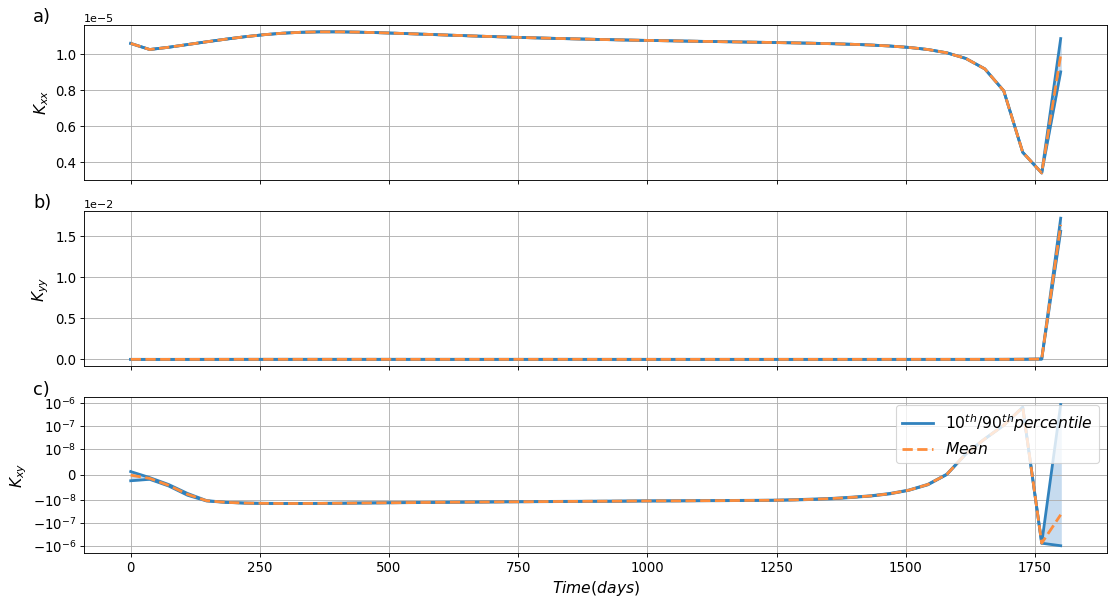

In [62]:
my_dpi = 80
fig, axs = plt.subplots(3, 1, figsize=(1100/my_dpi, 600/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)

ax1 = plt.subplot(311)
plot_k(t,k_x,p,epoch)
plt.yscale('linear')
plt.tick_params(axis='y',which='both', labelsize=12)
plt.grid()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.text(-0.05, 1.02, 'a)', transform=ax1.transAxes,size=16)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel(r'$K_{xx}$', fontsize= 14)


ax2 = plt.subplot(312)
plot_k(t,k_y,p,epoch)
plt.yscale('linear')
plt.tick_params(axis='y',which='both', labelsize=12)
plt.grid()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax2.text(-0.05, 1.02, 'b)', transform=ax2.transAxes,size=16)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.ylabel(r'$K_{yy}$', fontsize= 14)


ax3 = plt.subplot(313)
plot_k(t,k_xy,p,epoch)
plt.yscale('symlog', linthreshy=1e-8)
plt.tick_params(axis='y',which='both', labelsize=12)
plt.tick_params(axis='x',which='both', labelsize=12)
plt.legend(loc=1, fontsize= 14)
plt.grid()
ax3.text(-0.05, 1.02, 'c)', transform=ax3.transAxes,size=16)
plt.ylabel(r'$K_{xy}$', fontsize= 14)

plt.xlabel(r'$Time (days)$', fontsize= 14)

plt.savefig('./../../../plots/2d_k_evo_paper.pdf', bbox_inches='tight',dpi=my_dpi)
